## Contribution 
Zhou ze rui ()


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
pop = pd.read_csv("inverse.csv")
name_ch = {"Population, total":"pop_total"}
pop = pop.rename(columns = name_ch)
pop

,Indicator Name,Urban population (% of total population),Rural population growth (annual %),pop_total,Population ages 15-64 (% of total population),Population ages 0-14 (% of total population),Urban population,Rural population,"Population ages 15-64, total","Population ages 0-14, total",Rural population (% of total population),"Population ages 65 and above, total",Urban population growth (annual %),Population ages 65 and above (% of total population),Population growth (annual %)
0,1960,63.272,NaN,93216000,64.706440,29.494290,58979628,34236372,60316755,27493397,36.728,5405847,NaN,5.799270,NaN
1,1961,64.213,-1.699435,94055000,65.011315,29.076224,60395537,33659463,61146392,27347642,35.787,5560966,2.372312,5.912462,0.896034
2,1962,65.144,-1.706777,94933000,65.707862,28.267563,61843154,33089846,62378444,26835246,34.856,5719310,2.368619,6.024575,0.929166
3,1963,66.064,-1.661427,95900000,66.727038,27.121529,63355376,32544624,63991229,26009547,33.936,5899224,2.415836,6.151433,1.013460
4,1964,66.972,-1.671621,96903000,67.700249,26.011112,64897877,32005123,65603572,25205548,33.028,6093879,2.405515,6.288638,1.040450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,91.616,-1.088373,126811000,58.857734,12.240611,116179166,10631834,74638081,15522442,8.384,36650477,-0.038428,28.901654,-0.126880
59,2019,91.698,-1.123327,126633000,58.648137,12.072050,116119928,10513072,74267895,15287198,8.302,37077906,-0.051001,29.279814,-0.140465
60,2020,91.782,-1.311156,126261000,58.501114,11.915707,115884871,10376129,73864092,15044891,8.218,37352017,-0.202631,29.583178,-0.294195
61,2021,91.867,-1.499653,125681593,58.438944,11.773966,115459909,10221684,73446995,14797709,8.133,37436889,-0.367385,29.787090,-0.459952


In [3]:
pop.dropna(inplace=True)
new_column_names = {'Indicator Name': 'year'}
pop.rename(columns=new_column_names, inplace=True)
pop_age_dis = pop[["year","Population ages 15-64 (% of total population)",
                                         "Population ages 0-14 (% of total population)",
                                         "Population ages 65 and above (% of total population)",
                                         "Population ages 0-14, total",
                                         "Population ages 15-64, total",
                                         "Population ages 65 and above, total"]]
names = {"Population ages 15-64 (% of total population)": "Age_15-64_per",
         "Population ages 0-14 (% of total population)": "Age_0-14_per",
         "Population ages 65 and above (% of total population)": "Age_65+_per",
         "Population ages 0-14, total": "Age_0-14",
         "Population ages 15-64, total": "Age_15-64",
         "Population ages 65 and above, total": "Age_65+"}
pop_age_dis = pop_age_dis.rename(columns = names)
pop_age_dis = pop_age_dis.loc[pop_age_dis["year"] > 2004]
pop_age_dis

,year,Age_15-64_per,Age_0-14_per,Age_65+_per,Age_0-14,Age_15-64,Age_65+
45,2005,65.750744,13.644844,20.604412,17434426,84011699,26326876
46,2006,65.192933,13.549776,21.257291,17323931,83351772,27178297
47,2007,64.595352,13.463916,21.940732,17233947,82682697,28084356
48,2008,64.028588,13.389656,22.581756,17147195,81996931,28918875
49,2009,63.535944,13.298166,23.165890,17027903,81355870,29663227
50,2010,63.199072,13.200393,23.600535,16905743,80939051,30225206
51,2011,62.914430,13.107790,23.977780,16756081,80425404,30651515
52,2012,62.347024,13.005524,24.647452,16598820,79572883,31457297
53,2013,61.516329,12.902182,25.581488,16443186,78399486,32602328
54,2014,60.679080,12.793935,26.526985,16283609,77229906,33762485


<Axes: xlabel='year'>

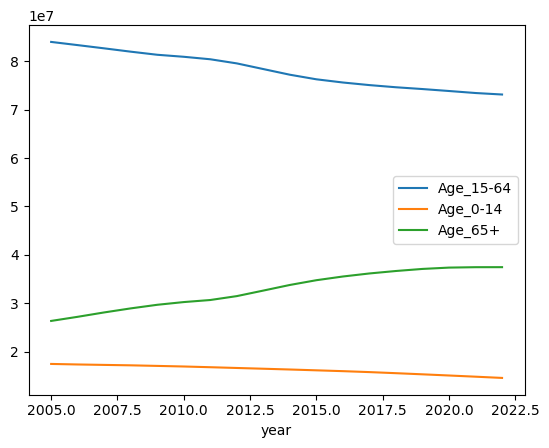

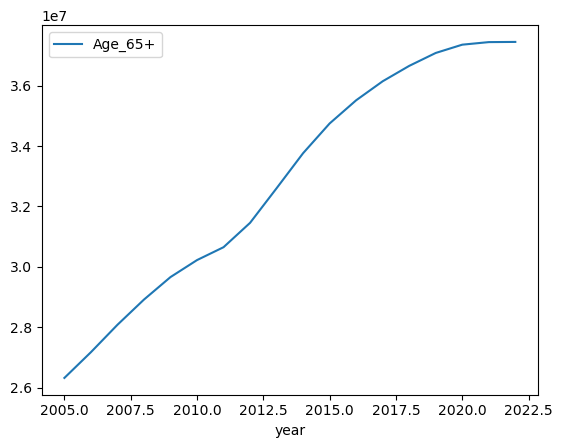

In [6]:
# plot population distribution
pop_age_dis.plot(x="year",y=["Age_15-64","Age_0-14","Age_65+"])
pop_age_dis.plot(x="year",y="Age_65+")


In [5]:
# plot population growth and amount tendency 
pop_incr_lab = pop[["year", "pop_total", "Population growth (annual %)"
                                         "Population ages 15-64, total",
                                         "Population ages 65 and above, total"]]

